In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=15,10

## Importamos los datos necesarios y motramos los ultimos datos de las 16 comunas

In [24]:
url          = "https://raw.githubusercontent.com/elaval/covid_chile_regional/master/coronavirus_data_chile_regions.tsv"
data         = pd.read_csv(url, sep='\t')
data["date"] = pd.to_datetime(data["date"], format='%Y-%m-%d')
data.tail(16)

,date,location,new_cases,total_cases,new_deaths,total_deaths
640,2020-04-12,Arica y Parinacota,8,115,1,1
641,2020-04-12,Tarapacá,8,46,0,0
642,2020-04-12,Antofagasta,21,138,0,1
643,2020-04-12,Atacama,0,13,0,0
644,2020-04-12,Coquimbo,2,66,0,0
645,2020-04-12,Valparaíso,6,254,0,2
646,2020-04-12,Metropolitana,151,3599,3,35
647,2020-04-12,O'Higgins,1,46,0,0
648,2020-04-12,Maule,4,138,0,3
649,2020-04-12,Ñuble,7,613,1,7


## Casos de contagios por día en el pais 

In [25]:
contagiados_por_fecha = data.groupby(['date'])['new_cases'].sum()
contagiados_por_fecha

date
2020-03-03      1
2020-03-04      2
2020-03-05      1
2020-03-06      1
2020-03-07      2
2020-03-08      3
2020-03-09      3
2020-03-10      4
2020-03-11      6
2020-03-12     10
2020-03-13     10
2020-03-14     18
2020-03-15     14
2020-03-16     81
2020-03-17     45
2020-03-18     37
2020-03-19    104
2020-03-20     92
2020-03-21    103
2020-03-22     95
2020-03-23    114
2020-03-24    176
2020-03-25    220
2020-03-26    164
2020-03-27    304
2020-03-28    299
2020-03-29    230
2020-03-30    310
2020-03-31    289
2020-04-01    293
2020-04-02    373
2020-04-03    332
2020-04-04    424
2020-04-05    310
2020-04-06    344
2020-04-07    301
2020-04-08    430
2020-04-09    426
2020-04-10    529
2020-04-11    426
2020-04-12    286
Name: new_cases, dtype: int64

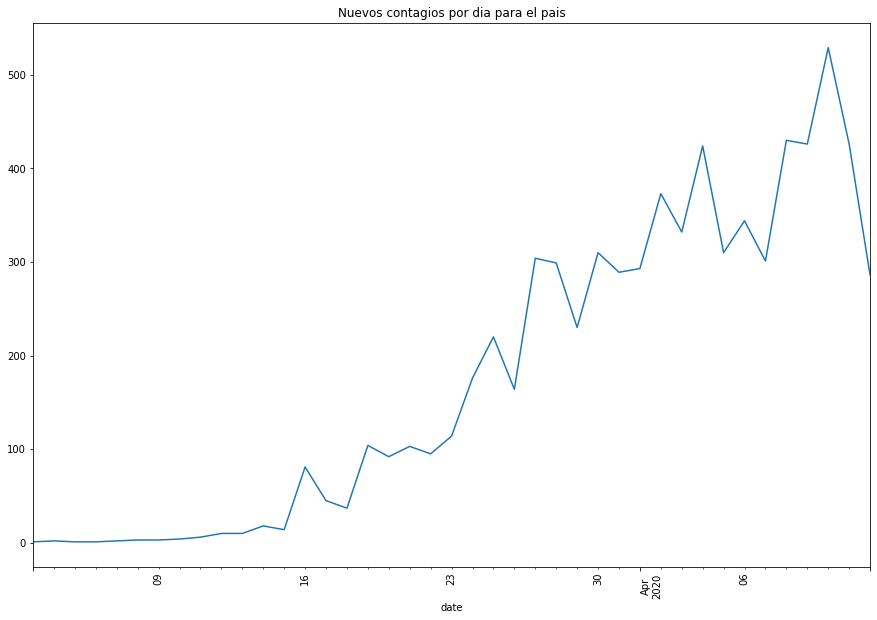

In [26]:
contagiados_por_fecha.plot(kind='line', title = 'Nuevos contagios por dia para el pais', rot=90)

## Nuevos casos de contagio por región 

In [27]:
contagios_por_fecha_region = data.groupby(['date', 'location'], as_index=False)['new_cases'].sum()
contagios_por_fecha_region.tail(16)

,date,location,new_cases
640,2020-04-12,Antofagasta,21
641,2020-04-12,Araucanía,36
642,2020-04-12,Arica y Parinacota,8
643,2020-04-12,Atacama,0
644,2020-04-12,Aysén,0
645,2020-04-12,Biobío,10
646,2020-04-12,Coquimbo,2
647,2020-04-12,Los Lagos,8
648,2020-04-12,Los Ríos,5
649,2020-04-12,Magallanes,19


In [28]:
def getGraphandList(name_region):
    region           = contagios_por_fecha_region.loc[contagios_por_fecha_region['location'] == name_region]
    title            = "Nuevos casos de contagio - " + str(name_region)
    region.plot(kind = 'line', title = title, rot=90, x='date', y='new_cases', grid=True)
    print(region)

          date            location  new_cases
2   2020-03-03  Arica y Parinacota          0
18  2020-03-04  Arica y Parinacota          0
34  2020-03-05  Arica y Parinacota          0
50  2020-03-06  Arica y Parinacota          0
66  2020-03-07  Arica y Parinacota          0
82  2020-03-08  Arica y Parinacota          0
98  2020-03-09  Arica y Parinacota          0
114 2020-03-10  Arica y Parinacota          0
130 2020-03-11  Arica y Parinacota          0
146 2020-03-12  Arica y Parinacota          0
162 2020-03-13  Arica y Parinacota          0
178 2020-03-14  Arica y Parinacota          0
194 2020-03-15  Arica y Parinacota          0
210 2020-03-16  Arica y Parinacota          0
226 2020-03-17  Arica y Parinacota          0
242 2020-03-18  Arica y Parinacota          0
258 2020-03-19  Arica y Parinacota          1
274 2020-03-20  Arica y Parinacota          0
290 2020-03-21  Arica y Parinacota          0
306 2020-03-22  Arica y Parinacota          1
322 2020-03-23  Arica y Parinacota

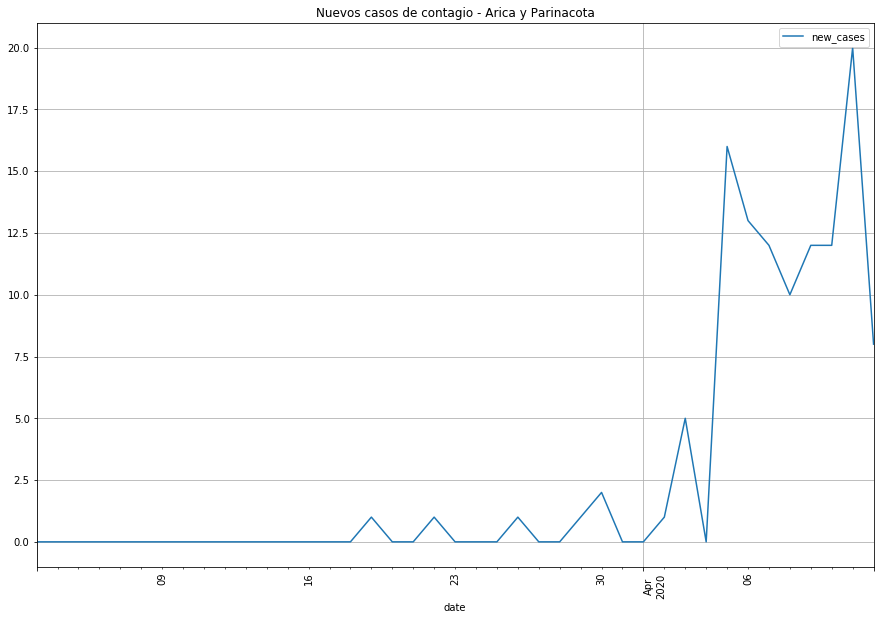

In [29]:
getGraphandList("Arica y Parinacota")

          date  location  new_cases
13  2020-03-03  Tarapacá          0
29  2020-03-04  Tarapacá          0
45  2020-03-05  Tarapacá          0
61  2020-03-06  Tarapacá          0
77  2020-03-07  Tarapacá          0
93  2020-03-08  Tarapacá          0
109 2020-03-09  Tarapacá          0
125 2020-03-10  Tarapacá          0
141 2020-03-11  Tarapacá          0
157 2020-03-12  Tarapacá          0
173 2020-03-13  Tarapacá          0
189 2020-03-14  Tarapacá          0
205 2020-03-15  Tarapacá          0
221 2020-03-16  Tarapacá          0
237 2020-03-17  Tarapacá          0
253 2020-03-18  Tarapacá          0
269 2020-03-19  Tarapacá          0
285 2020-03-20  Tarapacá          0
301 2020-03-21  Tarapacá          0
317 2020-03-22  Tarapacá          0
333 2020-03-23  Tarapacá          1
349 2020-03-24  Tarapacá          3
365 2020-03-25  Tarapacá          0
381 2020-03-26  Tarapacá          1
397 2020-03-27  Tarapacá          0
413 2020-03-28  Tarapacá          0
429 2020-03-29  Tarapacá    

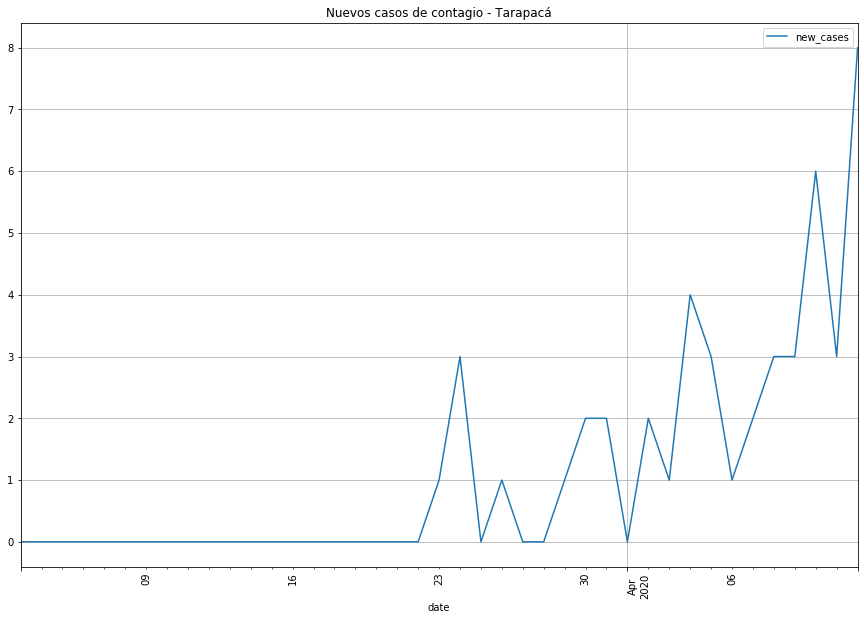

In [30]:
getGraphandList("Tarapacá")

          date     location  new_cases
0   2020-03-03  Antofagasta          0
16  2020-03-04  Antofagasta          0
32  2020-03-05  Antofagasta          0
48  2020-03-06  Antofagasta          0
64  2020-03-07  Antofagasta          0
80  2020-03-08  Antofagasta          0
96  2020-03-09  Antofagasta          0
112 2020-03-10  Antofagasta          0
128 2020-03-11  Antofagasta          0
144 2020-03-12  Antofagasta          0
160 2020-03-13  Antofagasta          0
176 2020-03-14  Antofagasta          2
192 2020-03-15  Antofagasta          0
208 2020-03-16  Antofagasta          0
224 2020-03-17  Antofagasta          0
240 2020-03-18  Antofagasta          0
256 2020-03-19  Antofagasta          0
272 2020-03-20  Antofagasta          4
288 2020-03-21  Antofagasta          4
304 2020-03-22  Antofagasta          1
320 2020-03-23  Antofagasta          0
336 2020-03-24  Antofagasta          2
352 2020-03-25  Antofagasta          6
368 2020-03-26  Antofagasta          1
384 2020-03-27  Antofagas

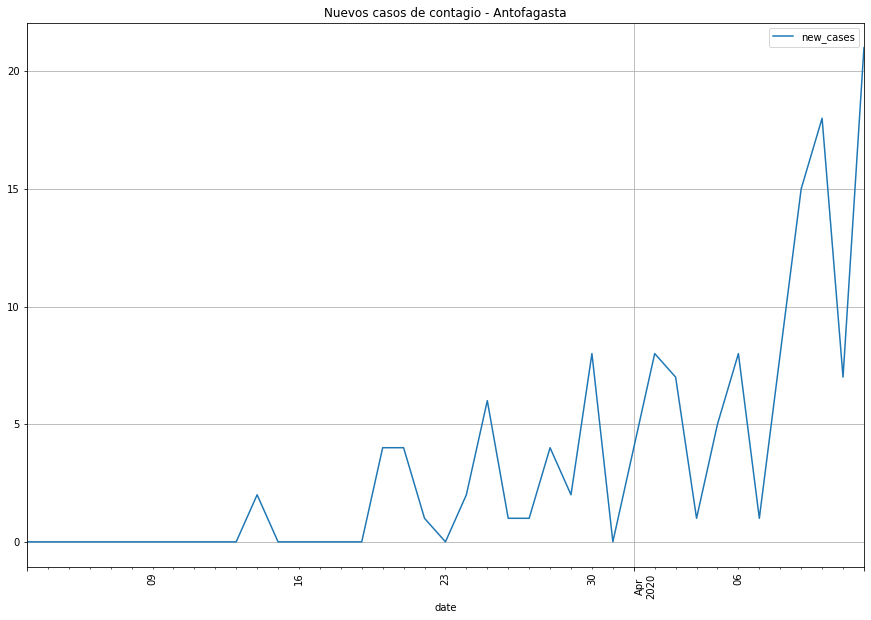

In [31]:
getGraphandList("Antofagasta")

          date location  new_cases
3   2020-03-03  Atacama          0
19  2020-03-04  Atacama          0
35  2020-03-05  Atacama          0
51  2020-03-06  Atacama          0
67  2020-03-07  Atacama          0
83  2020-03-08  Atacama          0
99  2020-03-09  Atacama          0
115 2020-03-10  Atacama          0
131 2020-03-11  Atacama          0
147 2020-03-12  Atacama          0
163 2020-03-13  Atacama          0
179 2020-03-14  Atacama          1
195 2020-03-15  Atacama          0
211 2020-03-16  Atacama          0
227 2020-03-17  Atacama          0
243 2020-03-18  Atacama          0
259 2020-03-19  Atacama          0
275 2020-03-20  Atacama          0
291 2020-03-21  Atacama          0
307 2020-03-22  Atacama          0
323 2020-03-23  Atacama          0
339 2020-03-24  Atacama          0
355 2020-03-25  Atacama          0
371 2020-03-26  Atacama          0
387 2020-03-27  Atacama          0
403 2020-03-28  Atacama          0
419 2020-03-29  Atacama          1
435 2020-03-30  Atac

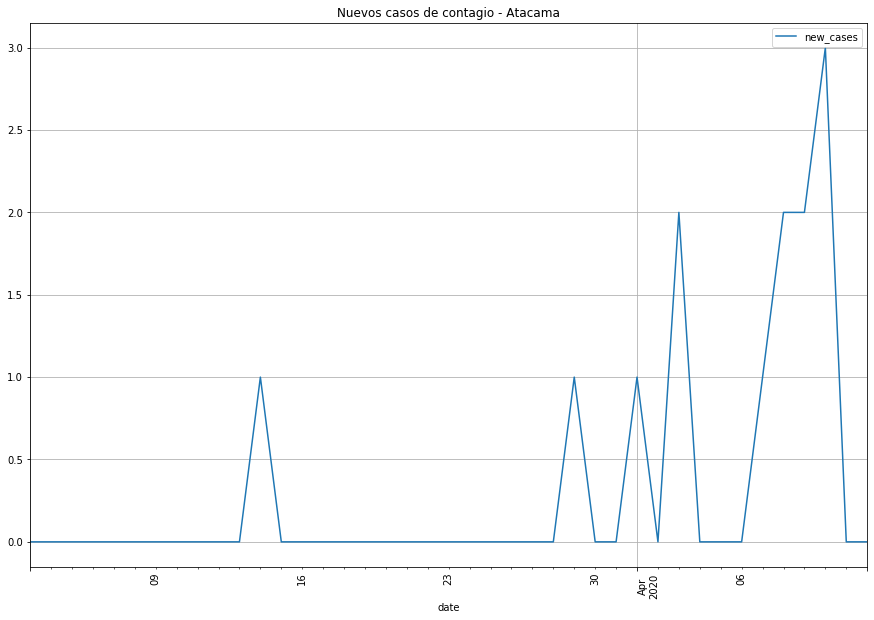

In [32]:
getGraphandList("Atacama")

          date  location  new_cases
6   2020-03-03  Coquimbo          0
22  2020-03-04  Coquimbo          0
38  2020-03-05  Coquimbo          0
54  2020-03-06  Coquimbo          0
70  2020-03-07  Coquimbo          0
86  2020-03-08  Coquimbo          0
102 2020-03-09  Coquimbo          0
118 2020-03-10  Coquimbo          0
134 2020-03-11  Coquimbo          0
150 2020-03-12  Coquimbo          0
166 2020-03-13  Coquimbo          0
182 2020-03-14  Coquimbo          0
198 2020-03-15  Coquimbo          0
214 2020-03-16  Coquimbo          0
230 2020-03-17  Coquimbo          0
246 2020-03-18  Coquimbo          0
262 2020-03-19  Coquimbo          2
278 2020-03-20  Coquimbo          1
294 2020-03-21  Coquimbo          0
310 2020-03-22  Coquimbo          2
326 2020-03-23  Coquimbo          1
342 2020-03-24  Coquimbo          5
358 2020-03-25  Coquimbo          1
374 2020-03-26  Coquimbo          1
390 2020-03-27  Coquimbo          1
406 2020-03-28  Coquimbo          1
422 2020-03-29  Coquimbo    

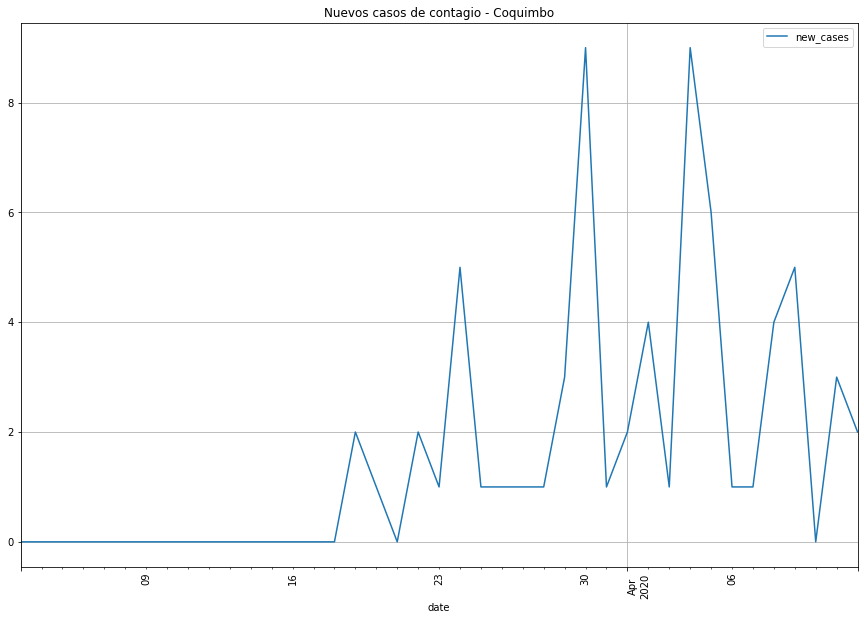

In [33]:
getGraphandList("Coquimbo")

          date    location  new_cases
14  2020-03-03  Valparaíso          0
30  2020-03-04  Valparaíso          0
46  2020-03-05  Valparaíso          0
62  2020-03-06  Valparaíso          0
78  2020-03-07  Valparaíso          0
94  2020-03-08  Valparaíso          0
110 2020-03-09  Valparaíso          0
126 2020-03-10  Valparaíso          0
142 2020-03-11  Valparaíso          0
158 2020-03-12  Valparaíso          0
174 2020-03-13  Valparaíso          0
190 2020-03-14  Valparaíso          0
206 2020-03-15  Valparaíso          0
222 2020-03-16  Valparaíso          1
238 2020-03-17  Valparaíso          0
254 2020-03-18  Valparaíso          0
270 2020-03-19  Valparaíso          3
286 2020-03-20  Valparaíso          1
302 2020-03-21  Valparaíso          8
318 2020-03-22  Valparaíso          3
334 2020-03-23  Valparaíso          3
350 2020-03-24  Valparaíso          6
366 2020-03-25  Valparaíso          7
382 2020-03-26  Valparaíso         12
398 2020-03-27  Valparaíso          5
414 2020-03-

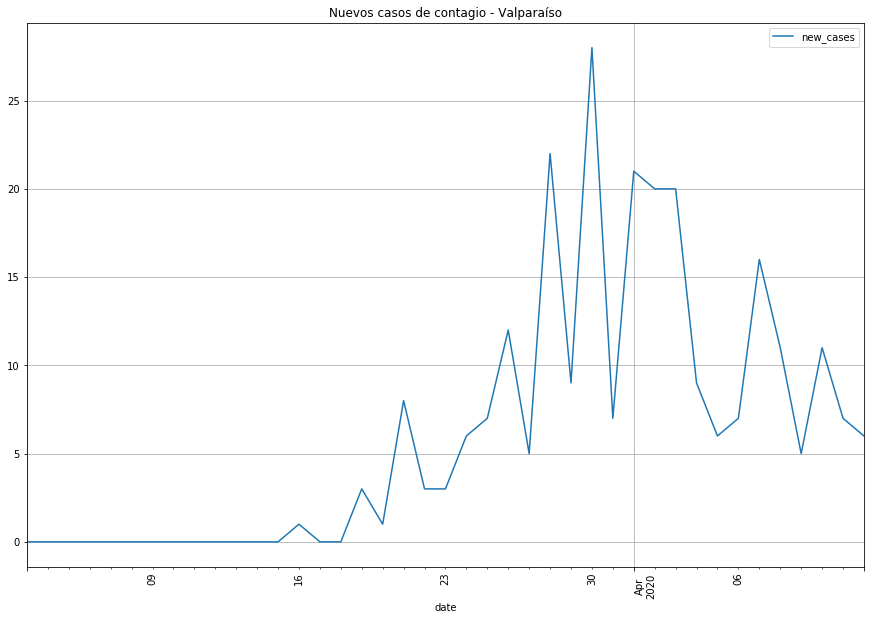

In [34]:
getGraphandList("Valparaíso")

          date       location  new_cases
11  2020-03-03  Metropolitana          0
27  2020-03-04  Metropolitana          1
43  2020-03-05  Metropolitana          1
59  2020-03-06  Metropolitana          1
75  2020-03-07  Metropolitana          1
91  2020-03-08  Metropolitana          2
107 2020-03-09  Metropolitana          1
123 2020-03-10  Metropolitana          3
139 2020-03-11  Metropolitana          4
155 2020-03-12  Metropolitana          9
171 2020-03-13  Metropolitana          6
187 2020-03-14  Metropolitana         11
203 2020-03-15  Metropolitana         14
219 2020-03-16  Metropolitana         69
235 2020-03-17  Metropolitana         29
251 2020-03-18  Metropolitana         22
267 2020-03-19  Metropolitana         73
283 2020-03-20  Metropolitana         57
299 2020-03-21  Metropolitana         55
315 2020-03-22  Metropolitana         50
331 2020-03-23  Metropolitana         50
347 2020-03-24  Metropolitana         81
363 2020-03-25  Metropolitana        142
379 2020-03-26  

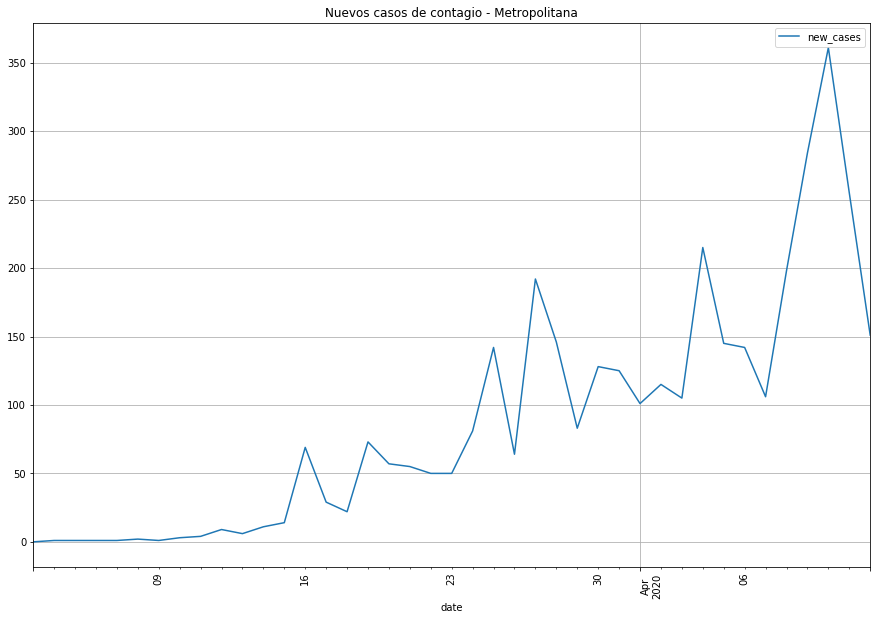

In [35]:
getGraphandList("Metropolitana")

          date   location  new_cases
12  2020-03-03  O'Higgins          0
28  2020-03-04  O'Higgins          0
44  2020-03-05  O'Higgins          0
60  2020-03-06  O'Higgins          0
76  2020-03-07  O'Higgins          0
92  2020-03-08  O'Higgins          0
108 2020-03-09  O'Higgins          0
124 2020-03-10  O'Higgins          0
140 2020-03-11  O'Higgins          0
156 2020-03-12  O'Higgins          0
172 2020-03-13  O'Higgins          0
188 2020-03-14  O'Higgins          0
204 2020-03-15  O'Higgins          0
220 2020-03-16  O'Higgins          0
236 2020-03-17  O'Higgins          0
252 2020-03-18  O'Higgins          0
268 2020-03-19  O'Higgins          2
284 2020-03-20  O'Higgins          4
300 2020-03-21  O'Higgins          1
316 2020-03-22  O'Higgins          1
332 2020-03-23  O'Higgins          0
348 2020-03-24  O'Higgins          1
364 2020-03-25  O'Higgins          2
380 2020-03-26  O'Higgins          3
396 2020-03-27  O'Higgins          2
412 2020-03-28  O'Higgins          4
4

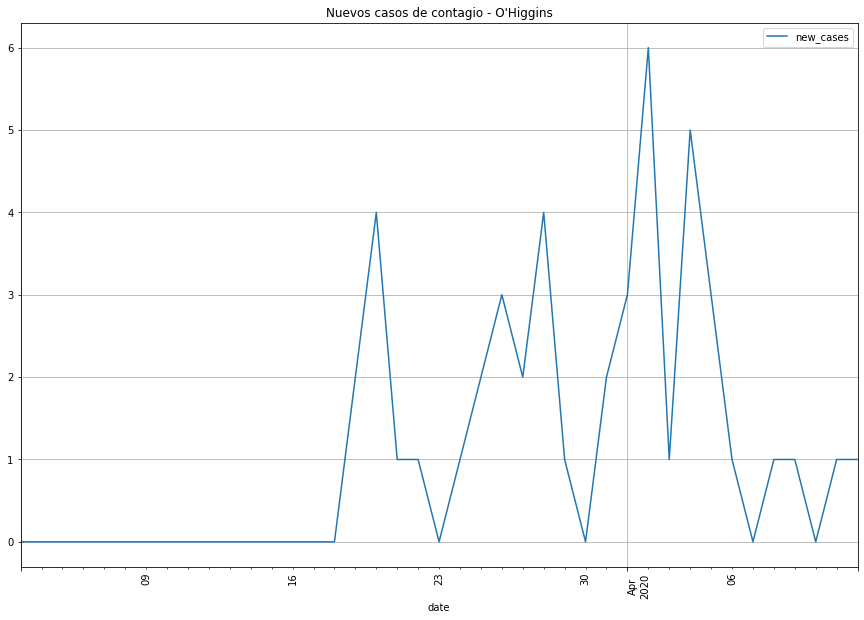

In [36]:
getGraphandList("O'Higgins")

          date location  new_cases
10  2020-03-03    Maule          1
26  2020-03-04    Maule          1
42  2020-03-05    Maule          0
58  2020-03-06    Maule          0
74  2020-03-07    Maule          0
90  2020-03-08    Maule          1
106 2020-03-09    Maule          1
122 2020-03-10    Maule          1
138 2020-03-11    Maule          2
154 2020-03-12    Maule          0
170 2020-03-13    Maule          1
186 2020-03-14    Maule          1
202 2020-03-15    Maule          0
218 2020-03-16    Maule          0
234 2020-03-17    Maule          0
250 2020-03-18    Maule          2
266 2020-03-19    Maule          3
282 2020-03-20    Maule          0
298 2020-03-21    Maule          1
314 2020-03-22    Maule         10
330 2020-03-23    Maule          3
346 2020-03-24    Maule          1
362 2020-03-25    Maule          1
378 2020-03-26    Maule          1
394 2020-03-27    Maule          1
410 2020-03-28    Maule          5
426 2020-03-29    Maule          5
442 2020-03-30    Ma

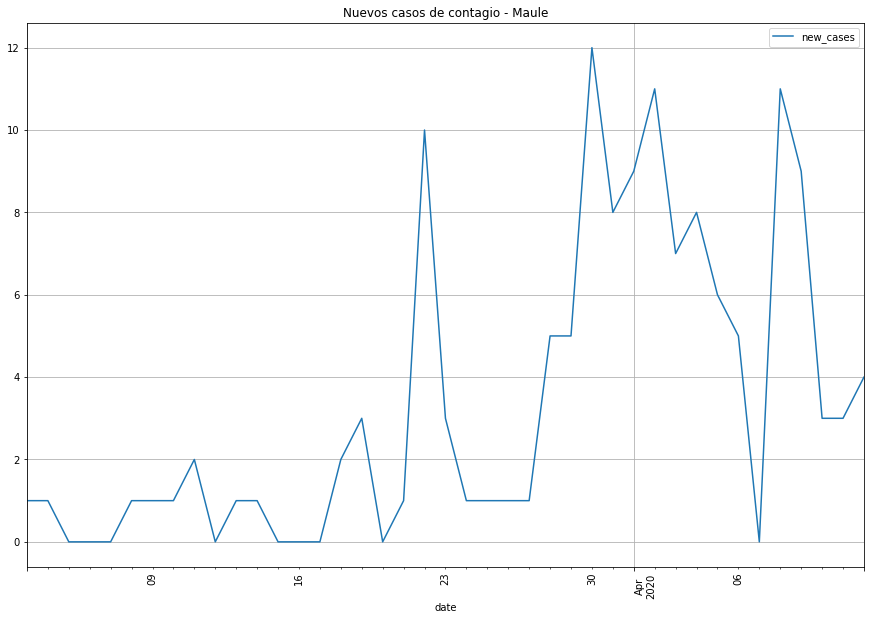

In [37]:
getGraphandList("Maule")

          date location  new_cases
15  2020-03-03    Ñuble          0
31  2020-03-04    Ñuble          0
47  2020-03-05    Ñuble          0
63  2020-03-06    Ñuble          0
79  2020-03-07    Ñuble          0
95  2020-03-08    Ñuble          0
111 2020-03-09    Ñuble          0
127 2020-03-10    Ñuble          0
143 2020-03-11    Ñuble          0
159 2020-03-12    Ñuble          1
175 2020-03-13    Ñuble          1
191 2020-03-14    Ñuble          2
207 2020-03-15    Ñuble          0
223 2020-03-16    Ñuble          8
239 2020-03-17    Ñuble         14
255 2020-03-18    Ñuble          0
271 2020-03-19    Ñuble          2
287 2020-03-20    Ñuble         16
303 2020-03-21    Ñuble         14
319 2020-03-22    Ñuble          6
335 2020-03-23    Ñuble         17
351 2020-03-24    Ñuble         24
367 2020-03-25    Ñuble          6
383 2020-03-26    Ñuble          3
399 2020-03-27    Ñuble         30
415 2020-03-28    Ñuble         28
431 2020-03-29    Ñuble         25
447 2020-03-30    Ñu

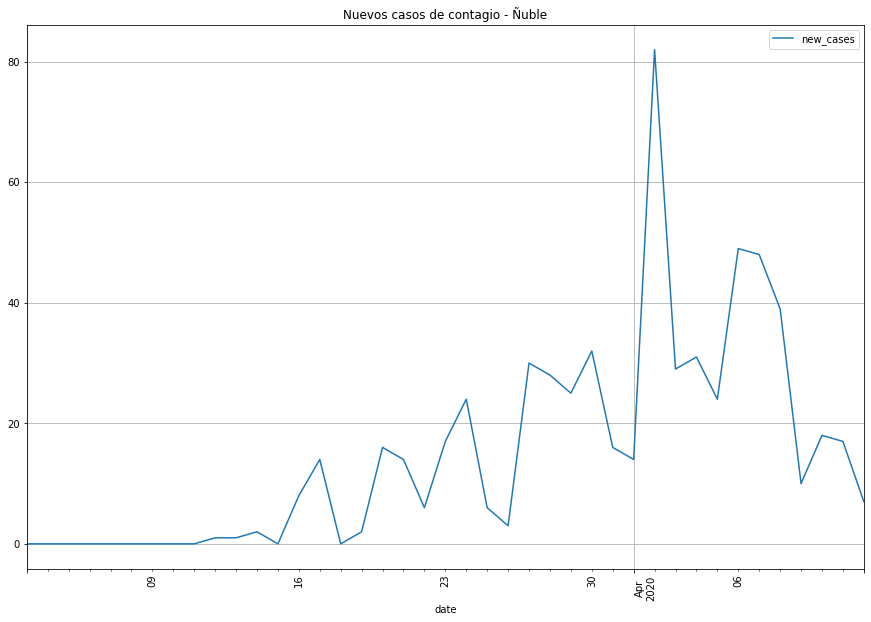

In [38]:
getGraphandList("Ñuble")

          date location  new_cases
5   2020-03-03   Biobío          0
21  2020-03-04   Biobío          0
37  2020-03-05   Biobío          0
53  2020-03-06   Biobío          0
69  2020-03-07   Biobío          0
85  2020-03-08   Biobío          0
101 2020-03-09   Biobío          1
117 2020-03-10   Biobío          0
133 2020-03-11   Biobío          0
149 2020-03-12   Biobío          0
165 2020-03-13   Biobío          2
181 2020-03-14   Biobío          0
197 2020-03-15   Biobío          0
213 2020-03-16   Biobío          1
229 2020-03-17   Biobío          0
245 2020-03-18   Biobío          3
261 2020-03-19   Biobío          7
277 2020-03-20   Biobío          5
293 2020-03-21   Biobío         11
309 2020-03-22   Biobío          5
325 2020-03-23   Biobío         11
341 2020-03-24   Biobío         27
357 2020-03-25   Biobío         22
373 2020-03-26   Biobío         14
389 2020-03-27   Biobío         26
405 2020-03-28   Biobío         16
421 2020-03-29   Biobío         34
437 2020-03-30   Bio

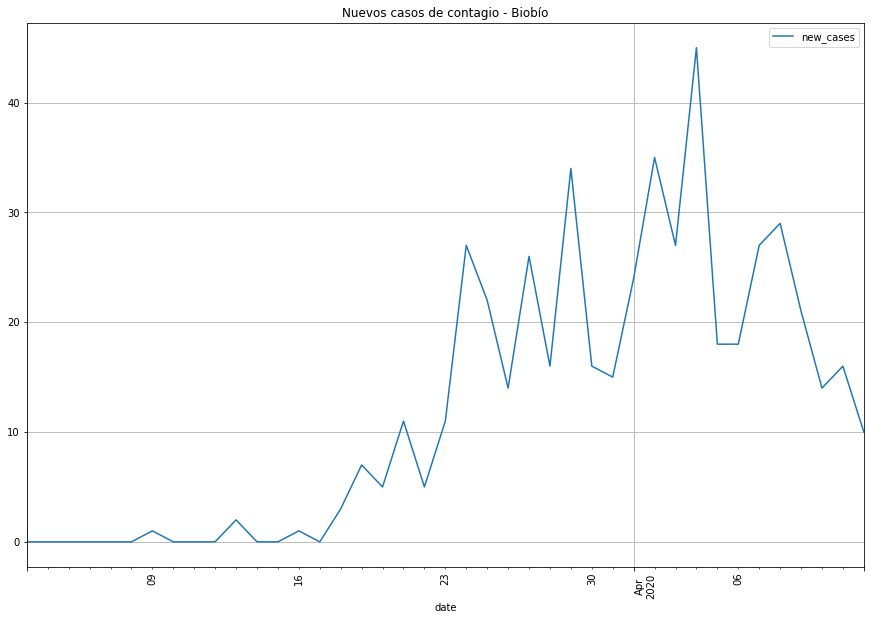

In [39]:
getGraphandList("Biobío")

          date   location  new_cases
1   2020-03-03  Araucanía          0
17  2020-03-04  Araucanía          0
33  2020-03-05  Araucanía          0
49  2020-03-06  Araucanía          0
65  2020-03-07  Araucanía          0
81  2020-03-08  Araucanía          0
97  2020-03-09  Araucanía          0
113 2020-03-10  Araucanía          0
129 2020-03-11  Araucanía          0
145 2020-03-12  Araucanía          0
161 2020-03-13  Araucanía          0
177 2020-03-14  Araucanía          0
193 2020-03-15  Araucanía          0
209 2020-03-16  Araucanía          1
225 2020-03-17  Araucanía          0
241 2020-03-18  Araucanía          3
257 2020-03-19  Araucanía          3
273 2020-03-20  Araucanía          2
289 2020-03-21  Araucanía          6
305 2020-03-22  Araucanía         12
321 2020-03-23  Araucanía         13
337 2020-03-24  Araucanía         19
353 2020-03-25  Araucanía         15
369 2020-03-26  Araucanía         37
385 2020-03-27  Araucanía         32
401 2020-03-28  Araucanía         34
4

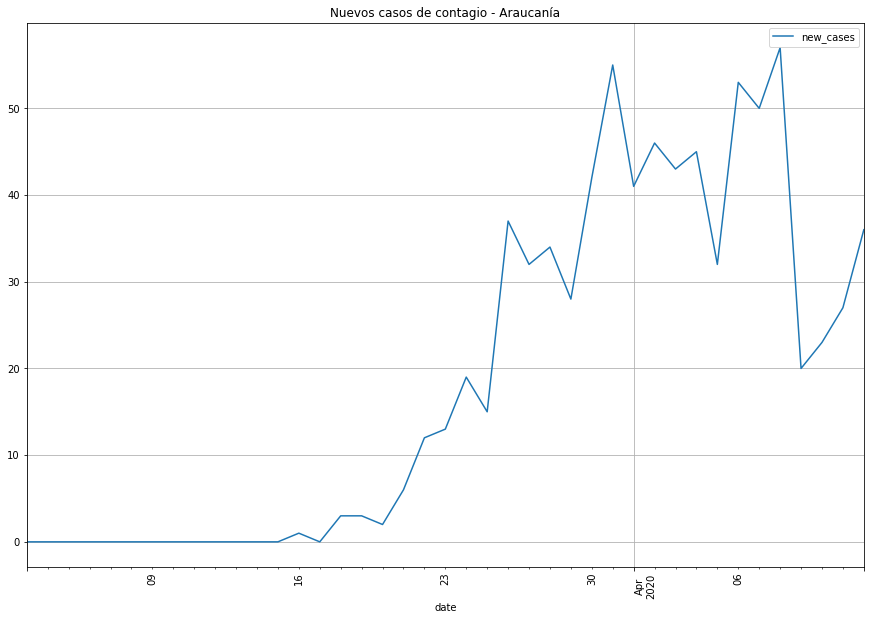

In [40]:
getGraphandList("Araucanía")

          date  location  new_cases
8   2020-03-03  Los Ríos          0
24  2020-03-04  Los Ríos          0
40  2020-03-05  Los Ríos          0
56  2020-03-06  Los Ríos          0
72  2020-03-07  Los Ríos          0
88  2020-03-08  Los Ríos          0
104 2020-03-09  Los Ríos          0
120 2020-03-10  Los Ríos          0
136 2020-03-11  Los Ríos          0
152 2020-03-12  Los Ríos          0
168 2020-03-13  Los Ríos          0
184 2020-03-14  Los Ríos          0
200 2020-03-15  Los Ríos          0
216 2020-03-16  Los Ríos          1
232 2020-03-17  Los Ríos          0
248 2020-03-18  Los Ríos          0
264 2020-03-19  Los Ríos          0
280 2020-03-20  Los Ríos          0
296 2020-03-21  Los Ríos          0
312 2020-03-22  Los Ríos          0
328 2020-03-23  Los Ríos          3
344 2020-03-24  Los Ríos          2
360 2020-03-25  Los Ríos          5
376 2020-03-26  Los Ríos          3
392 2020-03-27  Los Ríos          8
408 2020-03-28  Los Ríos          5
424 2020-03-29  Los Ríos    

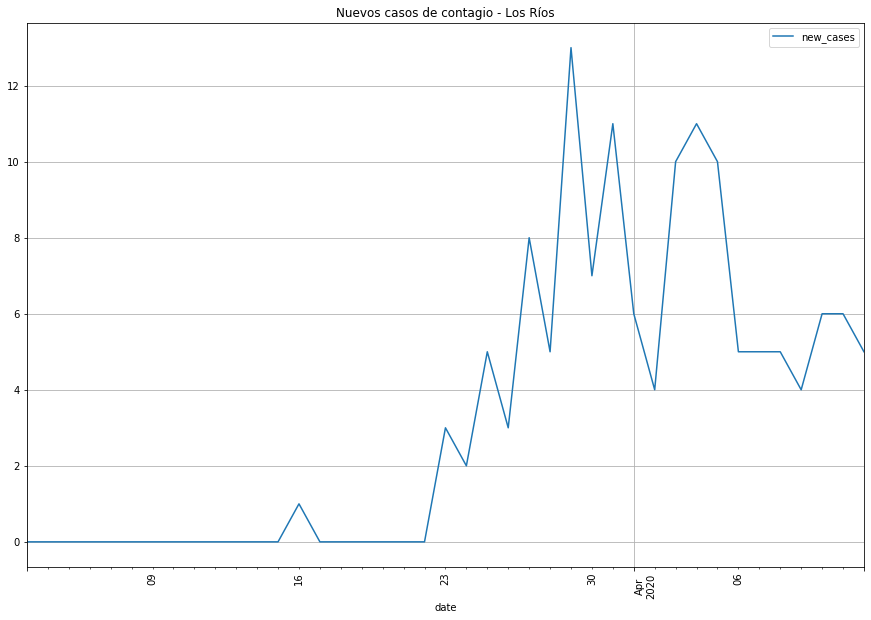

In [41]:
getGraphandList("Los Ríos")

          date   location  new_cases
7   2020-03-03  Los Lagos          0
23  2020-03-04  Los Lagos          0
39  2020-03-05  Los Lagos          0
55  2020-03-06  Los Lagos          0
71  2020-03-07  Los Lagos          1
87  2020-03-08  Los Lagos          0
103 2020-03-09  Los Lagos          0
119 2020-03-10  Los Lagos          0
135 2020-03-11  Los Lagos          0
151 2020-03-12  Los Lagos          0
167 2020-03-13  Los Lagos          0
183 2020-03-14  Los Lagos          0
199 2020-03-15  Los Lagos          0
215 2020-03-16  Los Lagos          0
231 2020-03-17  Los Lagos          0
247 2020-03-18  Los Lagos          7
263 2020-03-19  Los Lagos          8
279 2020-03-20  Los Lagos          2
295 2020-03-21  Los Lagos          2
311 2020-03-22  Los Lagos          3
327 2020-03-23  Los Lagos         10
343 2020-03-24  Los Lagos          3
359 2020-03-25  Los Lagos          8
375 2020-03-26  Los Lagos         16
391 2020-03-27  Los Lagos          3
407 2020-03-28  Los Lagos         30
4

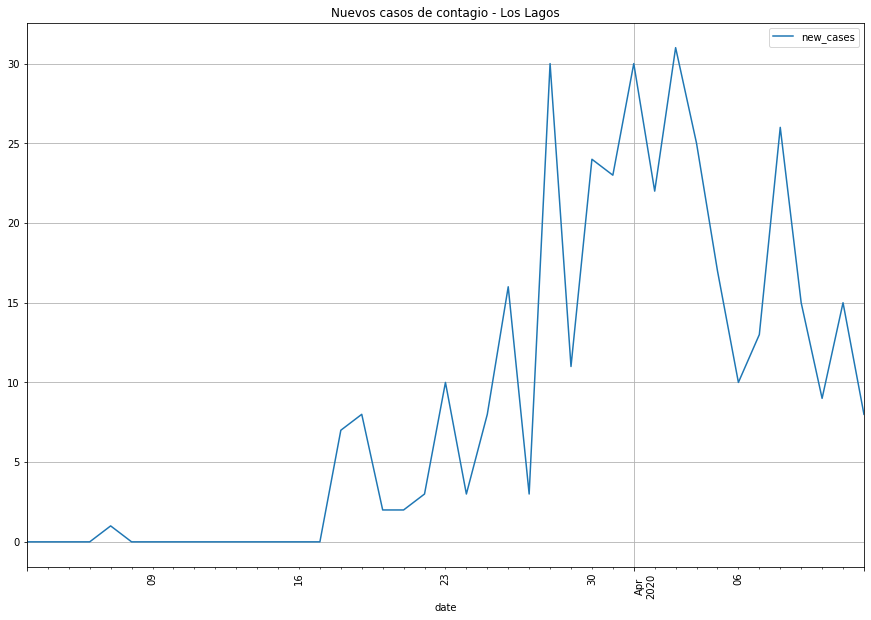

In [42]:
getGraphandList("Los Lagos")

          date location  new_cases
4   2020-03-03    Aysén          0
20  2020-03-04    Aysén          0
36  2020-03-05    Aysén          0
52  2020-03-06    Aysén          0
68  2020-03-07    Aysén          0
84  2020-03-08    Aysén          0
100 2020-03-09    Aysén          0
116 2020-03-10    Aysén          0
132 2020-03-11    Aysén          0
148 2020-03-12    Aysén          0
164 2020-03-13    Aysén          0
180 2020-03-14    Aysén          1
196 2020-03-15    Aysén          0
212 2020-03-16    Aysén          0
228 2020-03-17    Aysén          0
244 2020-03-18    Aysén          0
260 2020-03-19    Aysén          0
276 2020-03-20    Aysén          0
292 2020-03-21    Aysén          0
308 2020-03-22    Aysén          0
324 2020-03-23    Aysén          0
340 2020-03-24    Aysén          0
356 2020-03-25    Aysén          0
372 2020-03-26    Aysén          1
388 2020-03-27    Aysén          0
404 2020-03-28    Aysén          0
420 2020-03-29    Aysén          0
436 2020-03-30    Ay

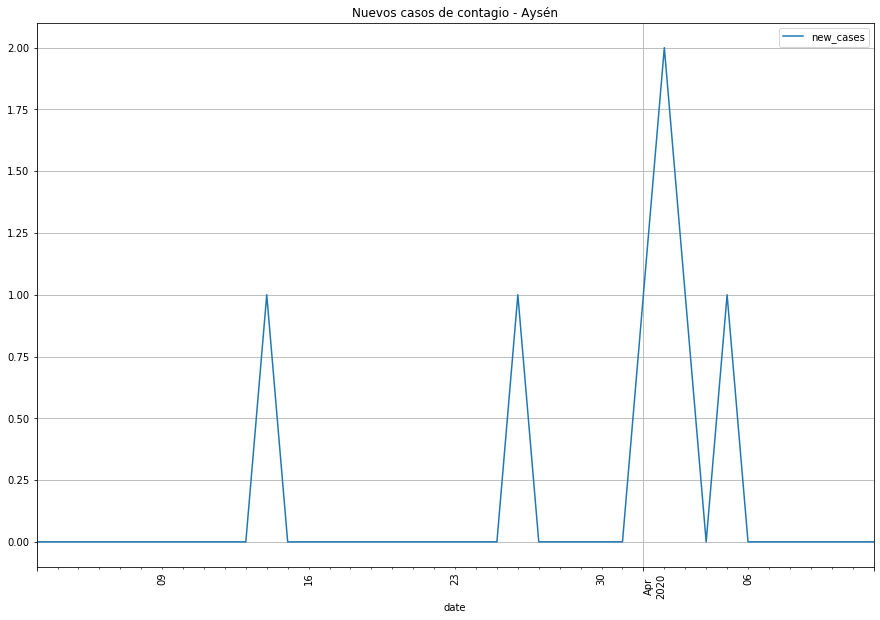

In [43]:
getGraphandList("Aysén")

          date    location  new_cases
9   2020-03-03  Magallanes          0
25  2020-03-04  Magallanes          0
41  2020-03-05  Magallanes          0
57  2020-03-06  Magallanes          0
73  2020-03-07  Magallanes          0
89  2020-03-08  Magallanes          0
105 2020-03-09  Magallanes          0
121 2020-03-10  Magallanes          0
137 2020-03-11  Magallanes          0
153 2020-03-12  Magallanes          0
169 2020-03-13  Magallanes          0
185 2020-03-14  Magallanes          0
201 2020-03-15  Magallanes          0
217 2020-03-16  Magallanes          0
233 2020-03-17  Magallanes          2
249 2020-03-18  Magallanes          0
265 2020-03-19  Magallanes          0
281 2020-03-20  Magallanes          0
297 2020-03-21  Magallanes          1
313 2020-03-22  Magallanes          1
329 2020-03-23  Magallanes          2
345 2020-03-24  Magallanes          2
361 2020-03-25  Magallanes          5
377 2020-03-26  Magallanes          6
393 2020-03-27  Magallanes          3
409 2020-03-

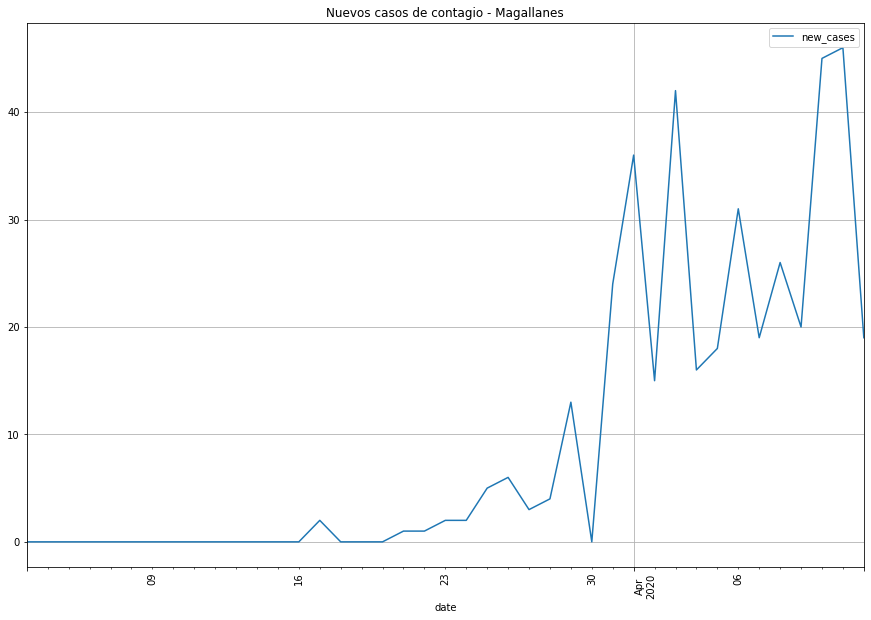

In [44]:
getGraphandList("Magallanes")

In [47]:
colors = ['#f15656', '#f18e56', '#f1c956', '#bdf156', '#74f367', '#67f3b3', '#67e6f3', '#67a9f3', '#6772f3', '#9167f3', '#de67f3', '#f367c9', '#f36789', '#1c306a', "#1c6a20", "#2c6a40"]
def getGraphandListall():
    icolor = 0
    name_regiones = contagios_por_fecha_region["location"].unique()
    
    for nregion in name_regiones:
        region           = contagios_por_fecha_region.loc[contagios_por_fecha_region['location'] == nregion]
        color            = colors[icolor]
        plt.plot(region["date"],region["new_cases"], color)
        icolor += 1
        
    plt.xlabel('Fecha')
    plt.ylabel('Cantidad de nuevo casos')
    plt.title('Curva de crecimiento por región')
    plt.legend(name_regiones, loc = 'best', bbox_to_anchor=(1.0, 1.0))
    plt.show()

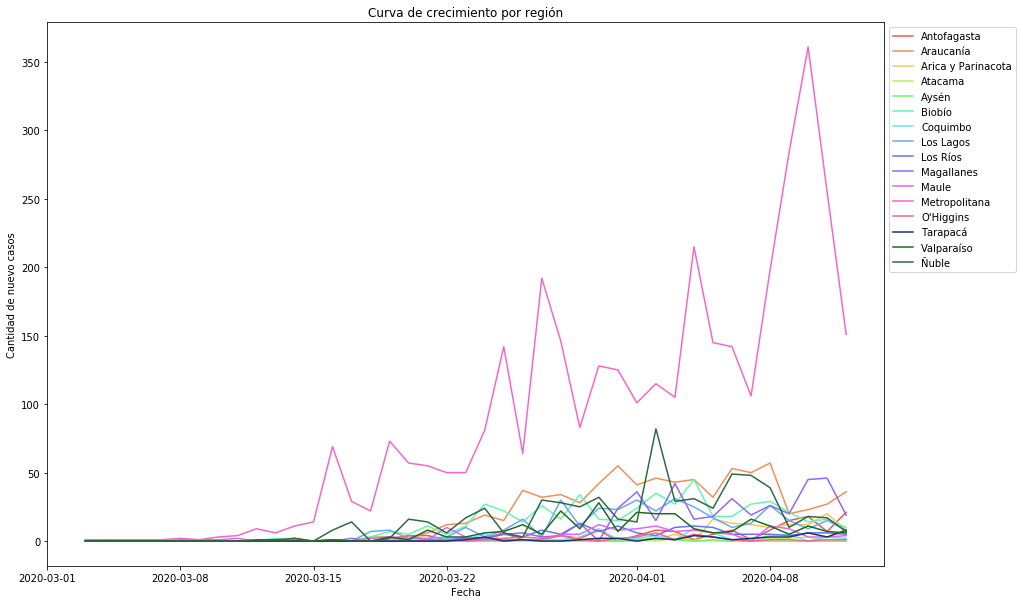

In [48]:
getGraphandListall()